In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [56]:
def survey(results, category_names, dataset_name):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    dataset_name : str
        Dataset name.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['gist_yarg'](
        np.linspace(0.15, 0.85, data.shape[1]))
    x = np.arange(len(results.keys()))  # the label locations
    width = 0.45  # the width of the bars
    multiplier = 0
    fig, ax = plt.subplots(figsize=(9.2, 5))

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        offset = width * multiplier
        widths = data[:, i]
        ax.bar(x+offset, widths, width=width,
                        label=colname, color=color)
        multiplier += 1

        r, g, b, _ = color
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')
    ax.set_xticks(x + width/2, labels)
    ax.tick_params(axis='both', which='major', labelsize=13)
    plt.xticks(rotation=20)
    plt.savefig(f'../fig/{dataset_name}_classdist.png', bbox_inches='tight', facecolor='white')
    return fig, ax


In [57]:
robod = pd.read_csv('../../data/ROBOD/combined_cleaned.csv')
robod.head()

,timestamp,voc [ppb],sound_pressure_level [dba],indoor_relative_humidity [%],air_temperature [Celsius],illuminance [lux],pm2.5 [mu_g/m3],indoor_co2 [ppm],wifi_connected_devices [number],ceiling_fan_energy [kWh],...,Room,wind_direction [Degree] - sin,wind_direction [Degree] - cos,timestamp_sin,timestamp_cos,0,1,2,3,4
0,2021-09-07 00:00:00,2.995732,-1.563104,0.551292,-1.350134,-2.302585,1.410987,3.558201,0.000000,0.0,...,Room 1,0.950554,-0.31056,0.0,1.0,0,1,0,0,0
1,2021-09-07 00:00:00,2.995732,0.065824,-0.030164,-5.513485,-2.302585,0.773190,4.069027,1.000000,0.0,...,Room 2,0.950554,-0.31056,0.0,1.0,0,1,0,0,0
2,2021-09-07 00:00:00,2.995732,0.057929,0.562527,0.468900,4.468548,2.233592,4.642787,0.000000,0.0,...,Room 3,0.950554,-0.31056,0.0,1.0,0,1,0,0,0
3,2021-09-07 00:00:00,2.995732,1.084233,0.811627,-1.112305,2.781714,1.892107,3.993910,1.000000,0.0,...,Room 4,0.950554,-0.31056,0.0,1.0,0,1,0,0,0
4,2021-09-07 00:00:00,4.947104,-1.033505,0.411590,0.582003,5.353121,2.087740,4.608166,1.732051,0.0,...,Room 5,0.950554,-0.31056,0.0,1.0,0,1,0,0,0


In [58]:
counter = robod.groupby(['Room', 'occupant_presence [binary]']).count()['timestamp'].reset_index().groupby('Room')['timestamp'].apply(list).to_dict()
counter

{'Room 1': [6592, 1760],
 'Room 2': [5978, 2374],
 'Room 3': [5019, 3333],
 'Room 4': [4723, 8813],
 'Room 5': [7777, 5759]}

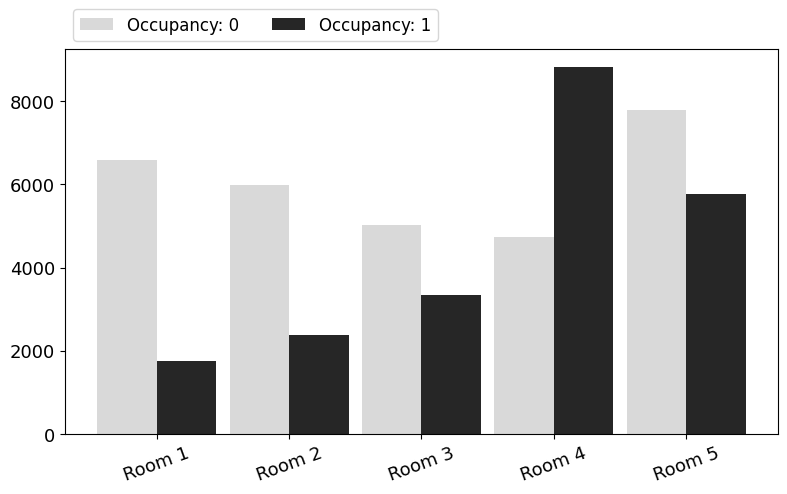

In [59]:
survey(counter, ['Occupancy: 0', 'Occupancy: 1'], 'ROBOD')
plt.show()

In [60]:
eco = pd.read_csv('../../data/ECO/combined_cleaned.csv')
eco.head()

,Unnamed: 0.1,Unnamed: 0,Timestamp,PowerAllPhases,PowerL1,PowerL2,PowerL3,CurrentNeutral,CurrentL1,CurrentL2,...,16,17,18,19,20,21,22,23,Occupancy15Min,Occupancy30Min
0,0,0,2012-06-01 00:00:00,9.627461,8.450621,4.612483,0.0,0.0,0.568859,0.397366,...,0,0,0,0,0,0,0,0,1,1
1,1,1,2012-06-01 00:00:30,9.599844,8.408567,4.631738,0.0,0.0,0.565951,0.397744,...,0,0,0,0,0,0,0,0,1,1
2,2,2,2012-06-01 00:01:00,9.572617,8.406902,4.578100,0.0,0.0,0.566127,0.396485,...,0,0,0,0,0,0,0,0,1,1
3,3,3,2012-06-01 00:01:30,9.570737,8.388206,4.608362,0.0,0.0,0.565685,0.401123,...,0,0,0,0,0,0,0,0,1,1
4,4,4,2012-06-01 00:02:00,9.555941,8.369946,4.610857,0.0,0.0,0.564624,0.397366,...,0,0,0,0,0,0,0,0,1,1


In [61]:
counter = eco.groupby(['Residency', 'value']).count()['Timestamp'].reset_index().groupby('Residency')['Timestamp'].apply(list).to_dict()
counter

{'Residency 01': [52397, 192403],
 'Residency 02': [96186, 266694],
 'Residency 03': [54624, 170016],
 'Residency 04': [16465, 231215],
 'Residency 05': [21133, 191987]}

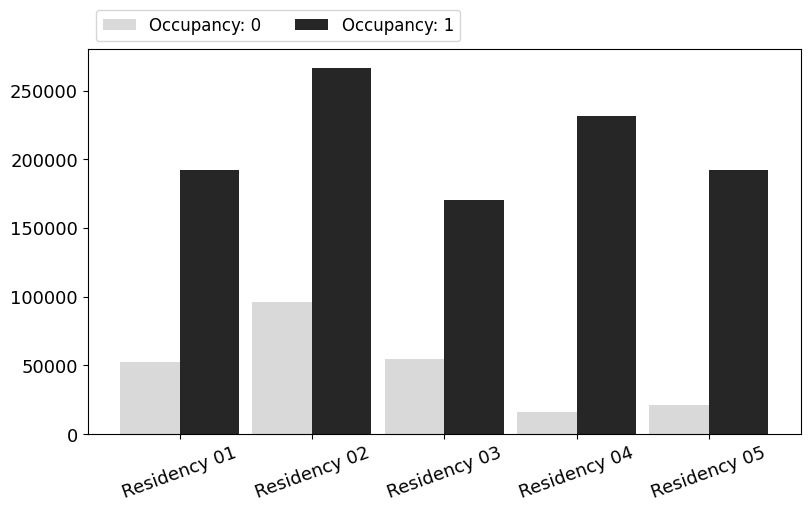

In [62]:
survey(counter, ['Occupancy: 0', 'Occupancy: 1'], 'ECO')
plt.show()

In [63]:
hpdmobile = pd.read_csv('../../data/HPDMobile/combined_cleaned.csv')
hpdmobile.head()

,Unnamed: 0,Timestamp,home,hub,tvoc_ppb,temp_c,rh_percent,light_lux,co2eq_ppm,co2eq_base,...,17,18,19,20,21,22,23,DaysSinceStart,Occupancy15Min,Occupancy30Min
0,0,2019-03-13 00:00:00,H2,RS4,0.0,1.145676,0.236429,7.484930,0.0,-0.011307,...,0,0,0,0,0,0,0,0,1,1
1,1,2019-03-13 00:01:00,H2,RS4,0.0,1.145676,0.236429,7.483526,0.0,-0.011307,...,0,0,0,0,0,0,0,0,1,1
2,2,2019-03-13 00:02:00,H2,RS4,0.0,1.150225,0.237334,7.442200,0.0,-0.011307,...,0,0,0,0,0,0,0,0,1,1
3,3,2019-03-13 00:03:00,H2,RS4,0.0,1.141127,0.240350,7.476472,0.0,-0.011307,...,0,0,0,0,0,0,0,0,1,1
4,4,2019-03-13 00:04:00,H2,RS4,0.0,1.145676,0.240048,7.480146,0.0,-0.011307,...,0,0,0,0,0,0,0,0,1,1


In [64]:
counter = hpdmobile.groupby(['Household', 'occupied']).count()['Timestamp'].reset_index().groupby('Household')['Timestamp'].apply(list).to_dict()
counter

{'Household 01': [37566, 172917],
 'Household 02': [37528, 57343],
 'Household 03': [52443, 189507],
 'Household 04': [21837, 98022],
 'Household 05': [20672, 66797],
 'Household 06': [112814, 98511]}

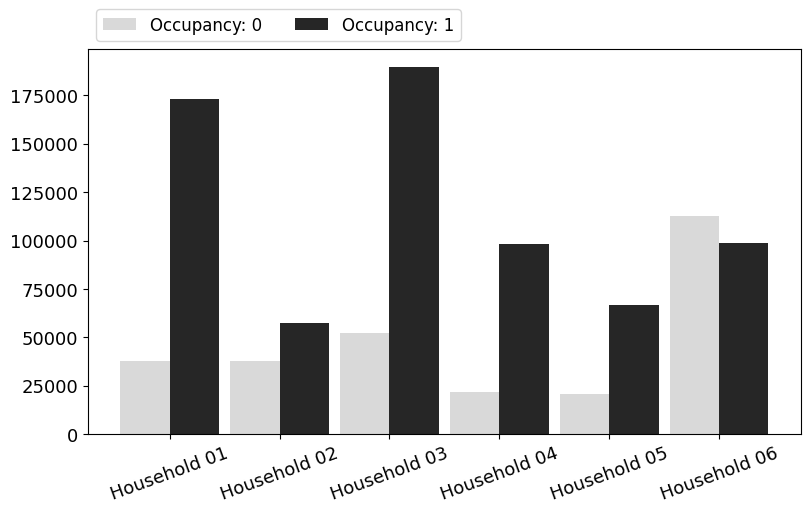

In [65]:
survey(counter, ['Occupancy: 0', 'Occupancy: 1'], 'HPDMobile')
plt.show()